<a href="https://colab.research.google.com/github/fatema373/Denoising_images-AutoEncoder-/blob/main/Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shiekhburhan/face-mask-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahmedhesham1432
Your Kaggle Key: ··········


100%|██████████| 2.33G/2.33G [02:02<00:00, 20.4MB/s]


In [ ]:
import keras
from keras import layers

# **Data preparing**

In [ ]:
from PIL import Image
from IPython.core.display import Path
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


def train_test_images (path_train, num_train=200): 
    train = list()
    files = Path(path_train).glob('*')
    for i,file in enumerate(files):
        if(i==num_train):
          break
        im = Image.open(file)
        # print(np.array(im).shape)
        im = im.resize(size=(256,256))
        # print(np.array(im).shape)
        na = np.array(im)
        train.append(na)

    return np.array(train)
train = train_test_images('/content/face-mask-dataset/FMD_DATASET/with_mask/simple',300) 
test = train_test_images('/content/face-mask-dataset/FMD_DATASET/with_mask/complex',50)

In [ ]:
import numpy as np
train = train.astype('float32') / 255
test = test.astype('float32') / 255
def noisy_data (data):
  # train = train.astype('float32') / 255 #Normalization of the image
  noisy_factor = 0.4
  noise = noisy_factor * np.random.normal(loc=0.0, scale=0.2, size=data.shape)
  noisy_data = np.clip(data + noise, 0., 1.) # clip the valuees in the range of the 0-->1
  return noisy_data

noisy_train = noisy_data(train)
noisy_test = noisy_data(test)

<function matplotlib.pyplot.show(*args, **kw)>

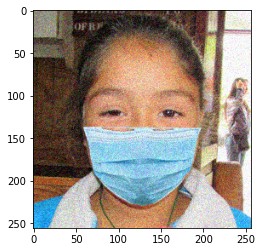

In [ ]:
plt.imshow(noisy_train[0])
plt.show

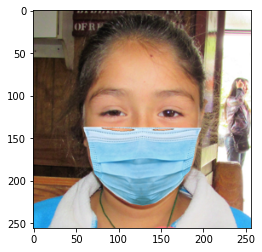

In [ ]:
plt.imshow(train[0])

# **AutoEncoder Architecture size of latent vector = 16**

In [ ]:
input_img = keras.Input(shape=(256, 256, 3))
# 128*128
y = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
y = layers.MaxPooling2D((2, 2), padding='same')(y)
# 64*64
y = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(y)
y = layers.MaxPooling2D((2, 2), padding='same')(y)

# 32*32
y = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(y)
y = layers.MaxPooling2D((2, 2), padding='same')(y)

y = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(y)

# length of latent vector is 16*16*8
encoded = layers.MaxPooling2D((2, 2), padding='same')(y) #16*16

In [ ]:
y = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
y = layers.UpSampling2D((2, 2))(y)

y = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(y)
y = layers.UpSampling2D((2, 2))(y)

y = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(y)
y = layers.UpSampling2D((2, 2))(y)
y = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(y)
y = layers.UpSampling2D((2, 2))(y)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(y)

In [ ]:
encoder=keras.Model(input_img,encoded)
encoder.summary()

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='MAE')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624

In [ ]:
history2 = autoencoder.fit(noisy_train, train, epochs=300)

Epoch 1/300
10/10 [==============================] - 14s 296ms/step - loss: 0.2448
Epoch 2/300
10/10 [==============================] - 2s 166ms/step - loss: 0.2138
Epoch 3/300
10/10 [==============================] - 2s 170ms/step - loss: 0.1567
Epoch 4/300
10/10 [==============================] - 2s 167ms/step - loss: 0.1241
Epoch 5/300
10/10 [==============================] - 2s 167ms/step - loss: 0.1132
Epoch 6/300
10/10 [==============================] - 2s 168ms/step - loss: 0.1089
Epoch 7/300
10/10 [==============================] - 2s 168ms/step - loss: 0.1055
Epoch 8/300
10/10 [==============================] - 2s 170ms/step - loss: 0.1015
Epoch 9/300
10/10 [==============================] - 2s 168ms/step - loss: 0.0991
Epoch 10/300
10/10 [==============================] - 2s 169ms/step - loss: 0.0965
Epoch 11/300
10/10 [==============================] - 2s 171ms/step - loss: 0.0949
Epoch 12/300
10/10 [==============================] - 2s 171ms/step - loss: 0.0925
Epoch 13/300

In [ ]:
autoencoder.save('auto_1.h5')

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624

In [ ]:
decoded_imgs_1 = autoencoder.predict(noisy_test)
decoded_imgs_1.shape
test.shape

2/2 [==============================] - 1s 759ms/step


(50, 256, 256, 3)

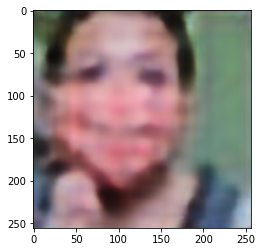

In [ ]:
plt.imshow(decoded_imgs_1[20])

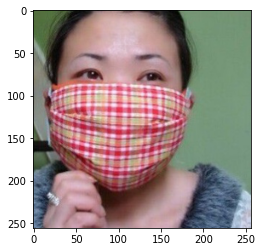

In [ ]:
plt.imshow(test[20])

In [ ]:
encoder = keras.Model(input_img, encoded)
latent_vectors = encoder.predict(test)
encoder.summary()

2/2 [==============================] - 0s 23ms/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d

In [ ]:
latent_vectors.shape

(50, 16, 16, 8)

In [ ]:
noisy_factor = 0.4
noise = noisy_factor * np.random.normal(loc=0.0, scale=0.2, size=latent_vectors.shape[1:])
noisy_latent_vectors = latent_vectors + noise

In [ ]:
noisy_latent_vectors.shape

(50, 16, 16, 8)

In [ ]:
len(autoencoder.weights)

18

Pass the image as it is without noise through the encoder part, then add noise to the
encoded vector, then decode it.

In [ ]:
#Decoder Arch
encoded_input = keras.Input(shape=noisy_latent_vectors.shape[1:])
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_input)
x = layers.UpSampling2D((2, 2))(x)
# 32*32*8
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# 32*32*16
x = layers.UpSampling2D((2, 2))(x)
# 64*64*16
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# 64*64*32
x = layers.UpSampling2D((2, 2))(x)
# 128*128*32
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# 128*128*64
x = layers.UpSampling2D((2, 2))(x)
# 256*256*64
last = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# 256*256*3
decoder = keras.Model(encoded_input,last)
decoder.summary()
#Assign the weight of decoder part in autoencoder to our new decoder
k = 0
for i in range (8,18):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16, 16, 8)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 up_sampling2d_4 (UpSampling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 16)        1168      
                                                                 
 up_sampling2d_5 (UpSampling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        4640

In [ ]:
decoded_laten_vactors = decoder.predict(noisy_latent_vectors)

2/2 [==============================] - 0s 29ms/step


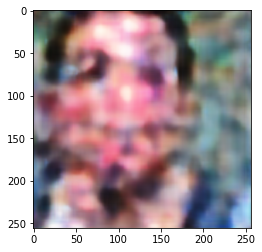

In [ ]:
plt.imshow(decoded_laten_vactors[20])

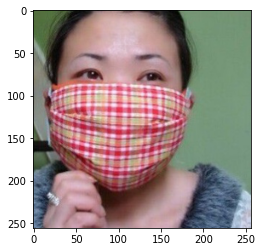

In [ ]:
plt.imshow(test[20])

# **AutoEncoder Architecture size of latent vector = 32**

In [ ]:
input_img_2 = keras.Input(shape=(256, 256, 3))
# 128*128
y_2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img_2)
y_2 = layers.MaxPooling2D((2, 2), padding='same')(y_2)

# 64*64
y_2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(y_2)
y_2 = layers.MaxPooling2D((2, 2), padding='same')(y_2)

# 32*32
y_2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(y_2)
y_2 = layers.MaxPooling2D((2, 2), padding='same')(y_2)

# length of latent vector is 32*32*8
encoded_2 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(y_2)


#32x32x8
y_2 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_2)
#32x32x8

y_2 = layers.UpSampling2D((2, 2))(y_2)
#64x64x8
y_2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(y_2)
#64x64x16
y_2 = layers.UpSampling2D((2, 2))(y_2)
#128x128x16
y_2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(y_2)
#128x128x32
y_2 = layers.UpSampling2D((2, 2))(y_2)
#256x256x32

y_2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(y_2)
#256x256x64
decoded_2 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(y_2)

autoencoder_2 = keras.Model(input_img_2, decoded_2)
autoencoder_2.compile(optimizer='adam', loss='MAE')
autoencoder_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 16)        4624

In [ ]:
history_2= autoencoder_2.fit(noisy_train, train, epochs=400)

Epoch 1/400
10/10 [==============================] - 5s 293ms/step - loss: 0.2423
Epoch 2/400
10/10 [==============================] - 2s 226ms/step - loss: 0.2032
Epoch 3/400
10/10 [==============================] - 2s 230ms/step - loss: 0.1404
Epoch 4/400
10/10 [==============================] - 2s 233ms/step - loss: 0.1103
Epoch 5/400
10/10 [==============================] - 2s 235ms/step - loss: 0.1006
Epoch 6/400
10/10 [==============================] - 2s 236ms/step - loss: 0.0945
Epoch 7/400
10/10 [==============================] - 2s 238ms/step - loss: 0.0913
Epoch 8/400
10/10 [==============================] - 2s 237ms/step - loss: 0.0848
Epoch 9/400
10/10 [==============================] - 2s 242ms/step - loss: 0.0841
Epoch 10/400
10/10 [==============================] - 2s 241ms/step - loss: 0.0849
Epoch 11/400
10/10 [==============================] - 2s 240ms/step - loss: 0.0803
Epoch 12/400
10/10 [==============================] - 2s 238ms/step - loss: 0.0748
Epoch 13/400


In [ ]:
autoencoder_2.save('autoencoder_2.h5')

In [ ]:
decoded_imgs_2 = autoencoder_2.predict(noisy_test)
decoded_imgs_2.shape

2/2 [==============================] - 1s 410ms/step


(50, 256, 256, 3)

In [ ]:
import cv2
img = cv2.imread('https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FThe-original-Lena-image-at-256-256-pixels-8-bits-per-pixel_fig1_2442068&psig=AOvVaw0aDvUtW_bVUJ8brwyKXk-s&ust=1671212676038000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCPDcgMKW_PsCFQAAAAAdAAAAABAD') 

image_custom = autoencoder_2.predict(img)


ValueError: ignored

TypeError: ignored

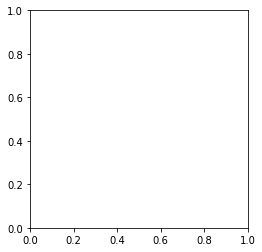

In [ ]:
plt.imshow(image_custom[])

# **Some noise in the latent vector**

In [ ]:
encoder_2 = keras.Model(input_img_2, encoded_2)
encoder_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 16)        4624

In [ ]:
latent_vectors_2 = encoder_2.predict(test)

2/2 [==============================] - 0s 19ms/step


In [ ]:
latent_vectors_2.shape

(50, 32, 32, 8)

## Adding noise to our latent vectors


In [ ]:
noise = noisy_factor * np.random.normal(loc=0.0, scale=0.2, size=latent_vectors_2.shape[1:])
noisy_latent_vectors_2 = latent_vectors_2 + noise

In [ ]:
#Decoder Arch
encoded_input_2 = keras.Input(shape=noisy_latent_vectors_2.shape[1:])
x_2 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_input_2)
x_2 = layers.UpSampling2D((2, 2))(x_2)
# 32*32*8
x_2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x_2)
# 32*32*16
x_2 = layers.UpSampling2D((2, 2))(x_2)
# 64*64*16
x_2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x_2)
# 64*64*32
x_2 = layers.UpSampling2D((2, 2))(x_2)
# 128*128*32
x_2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x_2)
# 256*256*64
last_2 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x_2)
# 256*256*3
decoder_2 = keras.Model(encoded_input_2,last_2)
decoder_2.summary()
#Assign the weight of decoder part in autoencoder to our new decoder
k = 0
for i in range (8,18):
    decoder_2.weights[k].assign(autoencoder_2.weights[i])
    k = k+1

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 8)]       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 8)         584       
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 up_sampling2d_12 (UpSamplin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 32)      4640

In [ ]:
decoded_laten_vactors_2 = decoder.predict(noisy_latent_vectors_2)

2/2 [==============================] - 0s 27ms/step


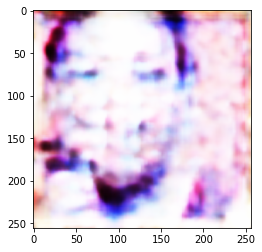

In [ ]:
plt.imshow(decoded_laten_vactors_2[20])

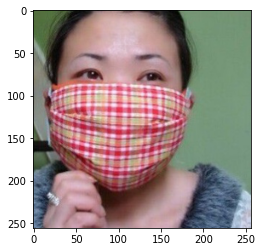

In [ ]:
plt.imshow(test[20])


```
Train multiple autoencoder to encode vectors of size 8,16,32,64 (You can add more). And encode
and decode a custom image.

Apply PCA reduction and restoration on the same image, using the top 8, 16, 32, 64 (same as the
above sizes) components.
Compare the PCA restored images using different component sizes with the Encoded then decoded
images using different autoencoder sizes. Show and compare the decoded and restored images and
write what you observe.

```



In [ ]:
from matplotlib import image as mapimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from PIL import Image
import cv2

In [ ]:
pca_train = list()
pca_test = list()
def splitting_into_channels(train, test):
  pca_train = list()
  pca_test = list()
  for i,j in zip(train,test):
    pca_train.append(cv2.split(i))
    pca_test.append(cv2.split(j))
  return np.array(pca_train)/255,np.array(pca_test)/255
pca_train,pca_test = splitting_into_channels(noisy_train,noisy_test)

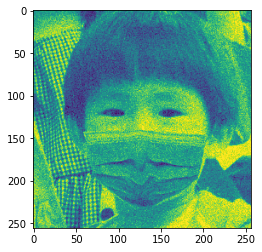

In [ ]:
plt.imshow(pca_train[2][0])

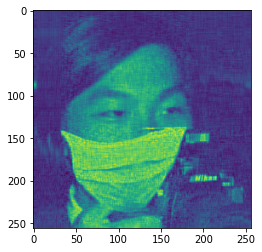

In [ ]:
def transformed_reconstructed_data(n_components,train_img,test_img):
  train = PCA(n_components)
  test = PCA(n_components)
  train.fit(train_img)
  test.fit(test_img)
  trans_train =train.transform(train_img)
  trans_test = test.transform(test_img)
  reconstructed_trian = train.inverse_transform(trans_train)
  reconstructed_test = test.inverse_transform(trans_test)
  return trans_train,reconstructed_trian,trans_test,reconstructed_test


n_components = 30
transformed_train = list()
transformed_test = list()
reconstructed_train = np.zeros(noisy_train.shape)
reconstructed_test = list()
k =0
for i,j in zip(pca_train,pca_test):
  # Blue channel

  b_transformed_train, b_reconstructed_train, b_transformed_test, b_reconstructed_test= transformed_reconstructed_data(n_components,i[0],j[0])


  # Green channel
  g_transformed_train, g_reconstructed_train, g_transformed_test, g_reconstructed_test= transformed_reconstructed_data(n_components,i[1],j[1])
  plt.imshow(g_reconstructed_train)
  # Red channel
  r_transformed_train, r_reconstructed_train, r_transformed_test, r_reconstructed_test= transformed_reconstructed_data(n_components,i[2],j[2])

  transformed_train.append([b_transformed_train,g_transformed_train,r_transformed_train])
  transformed_test.append([b_transformed_test,g_transformed_test,r_transformed_test])
  reconstructed_train[k]=np.array([b_reconstructed_train, g_reconstructed_train, r_reconstructed_train]).T
  k+=1
  reconstructed_test.append(cv2.merge((b_reconstructed_test, g_reconstructed_test, r_reconstructed_test)))


In [ ]:
transformed_test = np.array(transformed_test)
transformed_train = np.array(transformed_train)
reconstructed_train = np.array(reconstructed_train)
reconstructed_test = np.array(reconstructed_test)

In [ ]:
transformed_train.shape

(50, 3, 256, 30)

In [ ]:
reconstructed_train.shape

(300, 256, 256, 3)

In [ ]:
k =0
reconstracted_train = np.empty_like(noisy_train)
for imag in noisy_train:

    image = imag.reshape((3,256,256))
    pca = PCA(32)
    pca.fit(image[0])
    red = pca.transform(image[0])
    red = pca.inverse_transform(red)
    pca.fit(image[1])
    bl = pca.transform(image[1])
    bl = pca.inverse_transform(bl)
    pca.fit(image[2])
    yellow = pca.transform(image[2])
    yellow = pca.inverse_transform(yellow)
    reconstracted_train[k] = np.concatenate([red,bl,yellow]).reshape((256,256,3))
    k+=1


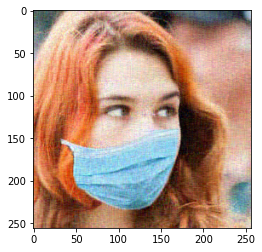

In [ ]:
plt.imshow(reconstracted_train[10])

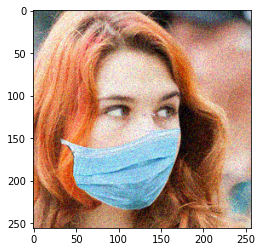

In [ ]:
plt.imshow(noisy_train[10])